In [1]:
# Imports
%pylab inline
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sn
from math import sin, cos, sqrt, atan2, radians
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer


# import sys  
# reload(sys)  
# sys.setdefaultencoding('utf8')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Read Dataset
oriData = pd.read_csv('lateste.csv')

In [18]:
# Data Clean
oriData.AtLatitude = oriData['AtLatitude'].astype('float') 
oriData.AtLongitude = oriData['AtLongitude'].astype('float') 
oriData.AtLatitudeIni = oriData['AtLatitudeIni'].astype('float') 
oriData.AtLongitudeIni = oriData['AtLongitudeIni'].astype('float') 
oriData.AtLatitudeEnd = oriData['AtLatitudeEnd'].astype('float') 
oriData.AtLongitudeEnd = oriData['AtLongitudeEnd'].astype('float') 

In [19]:
#distance between lat/lon

kmList = []

for i in range(oriData.shape[0]):
    R = 6373.0

    lat1 = radians(oriData.loc[i, 'AtLatitude'])
    lon1 = radians(oriData.loc[i, 'AtLongitude'])
    lat2 = radians(oriData.loc[i, 'AtLatitudeIni'])
    lon2 = radians(oriData.loc[i, 'AtLongitudeIni' ])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    saved_km = R * c
    kmList.append(saved_km)
    
oriData['kmIni'] = kmList

# ----------------------------------------------#

kmList = []

for i in range(oriData.shape[0]):
    R = 6373.0

    lat1 = radians(oriData.loc[i, 'AtLatitude'])
    lon1 = radians(oriData.loc[i, 'AtLongitude'])
    lat2 = radians(oriData.loc[i, 'AtLatitudeEnd'])
    lon2 = radians(oriData.loc[i, 'AtLongitudeEnd' ])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    saved_km = R * c
    kmList.append(saved_km)
    
oriData['kmEnd'] = kmList

In [20]:
# Validating if Gloss
gloss = []

for i in range(oriData.shape[0]):
    var1 = oriData.loc[i, 'kmIni']
    var2 = oriData.loc[i, 'kmEnd']

    if var1>1 or var2>1:
         gloss.append(1)
    else:
        gloss.append(0)
        
oriData['AtGloss'] = gloss

In [21]:
oriData.describe()

,PaID,PaSex,PrID,PrExperience,AtIntercurrence,AtTotalTime,AtLatitude,AtLongitude,AtLatitudeIni,AtLongitudeIni,AtLatitudeEnd,AtLongitudeEnd,kmIni,kmEnd,AtGloss
count,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000
mean,1843.827519,1.590326,3285.076579,2.672286,0.185838,82.474647,-22.744191,-46.777524,-22.887962,-46.712458,-22.888452,-46.712961,20.687286,21.509419,0.267086
std,1978.834087,0.491921,4299.057721,1.168834,0.388989,279.555751,3.791555,2.282602,2.062888,1.449344,2.063110,1.449378,385.305299,385.335619,0.442452
min,4.000000,0.000000,42.000000,1.000000,0.000000,11.000000,-30.890569,-106.145138,-30.153771,-63.875543,-30.154359,-63.875599,0.000000,0.000030,0.000000
25%,317.000000,1.000000,243.000000,2.000000,0.000000,26.000000,-23.608631,-46.754898,-23.607007,-46.754749,-23.607803,-46.754764,0.015233,0.020371,0.000000
50%,1106.000000,2.000000,1364.000000,3.000000,0.000000,38.000000,-23.565131,-46.636857,-23.565152,-46.637260,-23.565343,-46.637887,0.042408,0.066879,0.000000
75%,2895.000000,2.000000,4332.000000,4.000000,0.000000,56.000000,-23.456126,-46.582916,-23.454314,-46.584062,-23.438514,-46.584975,0.232722,0.985344,1.000000
max,7354.000000,2.000000,17474.000000,5.000000,1.000000,17395.000000,55.647634,41.993283,2.832068,-34.886257,2.832162,-34.885842,11970.320012,11970.322783,1.000000


In [22]:
data = oriData.drop(["PaID","PrID","AtLatitude","AtLongitude","AtLatitudeIni","AtLongitudeIni","AtLatitudeEnd","AtLongitudeEnd","AtDateIni","AtDateEnd", "kmIni","kmEnd"], axis=1)

In [23]:
data

,PaBirth,PaSex,PrExperience,AtInsurance,AtSpecialty,AtCategory,AtData,AtDataWeek,AtIntercurrence,AtTotalTime,AtEvolution,AtGloss
0,16-01-1936,1,4,Plasac,Respiratória,Fisioterapia,01-01-2017,Sun,0,84,paciente encontra-se dispneico ausculta pulmon...,1
1,01-02-1977,2,3,São Cristóvão,Ortopédica,Fisioterapia,01-01-2017,Sun,0,46,"Paciente TQT, consciente , PA 110x70, AP: Mv+c...",0
2,23-11-1931,2,3,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,0,26,"encontro pacte sentada vendo tv,feito curativo...",0
3,17-01-1936,2,2,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,0,49,Administrado antibioticoterapia conforme presc...,0
4,26-04-1933,1,2,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,0,49,administrado medicação conforme prescrição méd...,0
5,15-09-1915,2,3,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,0,35,curativos em MMII com uso de SF kollagenase e ...,0
6,28-12-1939,2,3,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,0,34,01/01/2017 realizada medicação conforme prescr...,0
7,26-07-1937,2,3,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,0,29,administração de rocefin 2g com SF 100ml ev em...,0
8,24-05-1924,2,2,São Francisco,Procedimento,Téc. Enfermagem,01-01-2017,Sun,0,17,"Administrado 1g de ertapeném, diluído em 3,2 m...",0
9,25-09-1941,1,2,Economus,Procedimento,Téc. Enfermagem,01-01-2017,Sun,0,22,realizado troca de curativo em MID ocluido com...,0


In [24]:
g = sn.factorplot(x="AtInsurance", y="AtIntercurrence", data=data, capsize=.2, pallete="Y1GnBu_d", size=14)
g.despine(left=True)
g.set_xticklabels(rotation=60)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

In [25]:
g = sn.factorplot(x="AtCategory", y="AtIntercurrence", data=data, capsize=.2, pallete="Y1GnBu_d", size=14)
g.despine(left=True)
g.set_xticklabels(rotation=60)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

In [26]:
g = sn.factorplot(x="AtSpecialty", y="AtIntercurrence", data=data, capsize=.2, pallete="Y1GnBu_d", size=14)
g.despine(left=True)
g.set_xticklabels(rotation=60)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 8: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 8: ordinal not in range(128)

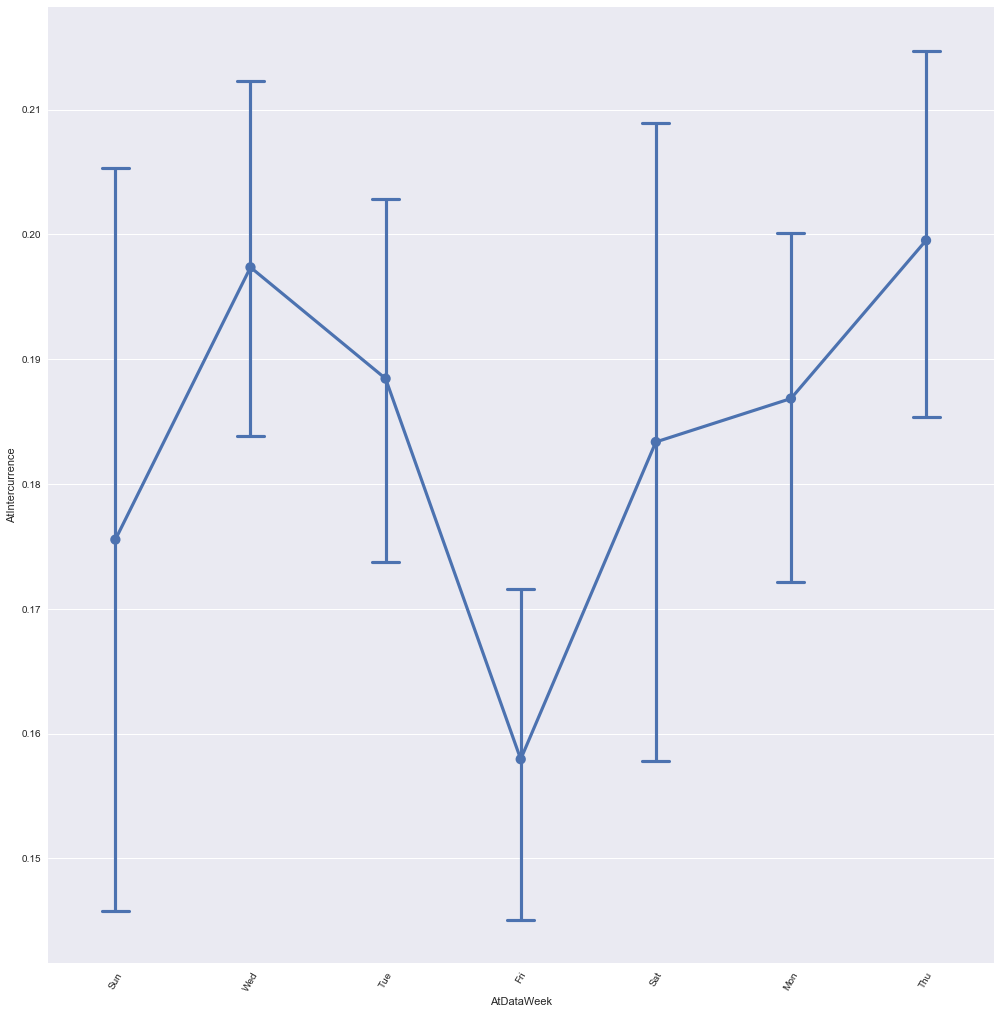

In [27]:
g = sn.factorplot(x="AtDataWeek", y="AtIntercurrence", data=data, capsize=.2, pallete="Y1GnBu_d", size=14)
g.despine(left=True)
g.set_xticklabels(rotation=60)

In [28]:
g = sn.factorplot(x="AtInsurance", y="AtGloss", data=data, capsize=.2, pallete="Y1GnBu_d", size=14)
g.despine(left=True)
g.set_xticklabels(rotation=60)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

In [29]:
g = sn.factorplot(x="AtCategory", y="AtGloss", data=data, capsize=.2, pallete="Y1GnBu_d", size=14)
g.despine(left=True)
g.set_xticklabels(rotation=60)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

In [30]:
g = sn.factorplot(x="AtSpecialty", y="AtGloss", data=data, capsize=.2, pallete="Y1GnBu_d", size=14)
g.despine(left=True)
g.set_xticklabels(rotation=60)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 8: ordinal not in range(128)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 8: ordinal not in range(128)

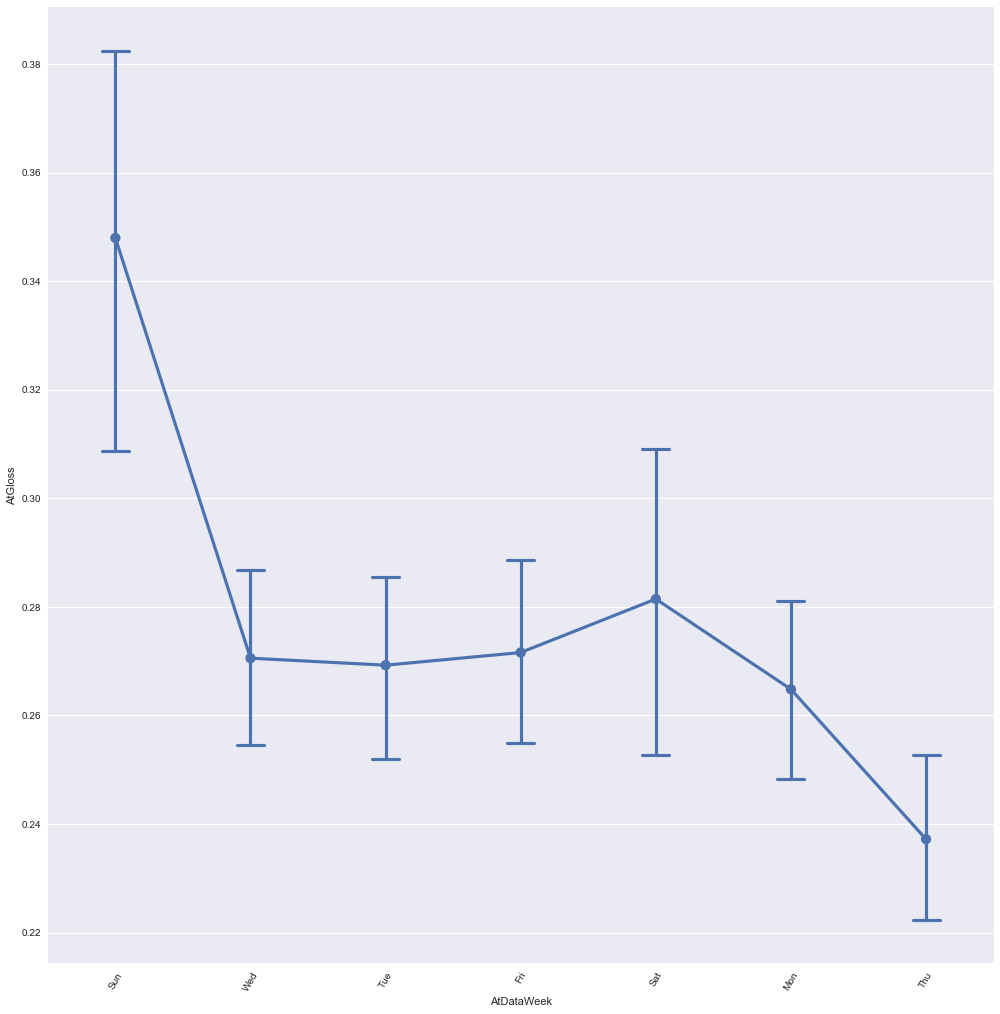

In [31]:
g = sn.factorplot(x="AtDataWeek", y="AtGloss", data=data, capsize=.2, pallete="Y1GnBu_d", size=14)
g.despine(left=True)
g.set_xticklabels(rotation=60)

In [32]:
vectorizer = CountVectorizer(max_features = 1000, 
                             ngram_range=(1, 2), 
                             stop_words=frozenset(["a","paciente","à","agora","ainda","alguem","alguém","algum","alguma","algumas","alguns","ampla","amplas","amplo","amplos","ante","antes","ao","aos","apos","após","aquela","aquelas","aquele","aqueles","aquilo","as","ate","até","atraves","através","cada","coisa","coisas","com","como","contra","contudo","da","daquele","daqueles","das","de","dela","delas","dele","deles","depois","dessa","dessas","desse","desses","desta","destas","deste","destes","deve","devem","devendo","dever","devera","deverá","deverao","deverão","deveria","deveriam","devia","deviam","disse","disso","disto","dito","diz","dizem","do","dos","dou","e","é","ela","elas","ele","eles","em","enquanto", "entra","entre","era","essa","essas","esse","esses","esta","está","estamos","estao","estão","estas","estava","estavam","estavamos","estávamos","este","estes","estou","eu","fazendo","fazer","feita","feitas","feito","fica","feitos","foi","for","foram","fosse","fossem","grande","grandes","ha","há","isso","isto","ja","já","la","lá","lhe","lhes","lo","mas","me","mesma","mesmas","mesmo","mesmos","meu","meus","minha","minhas","muita","muitas","muito","muitos","na","nao","não","nas","nem","nenhum","nessa","nessas","nesta","nestas","ninguém","no","nos","nós","nossa","nossas","nosso","nossos","num","numa","nunca","o","os","ou","outra","outras","outro","outros","para","pela","pelas","pelo","pelos","pequena","pequenas","per","perante","pode","pôde","podendo","poder","poderia","poderiam","podia","podiam","pois","por","porem","porém","porque","posso","pouca","poucas","pouco","poucos","primeiro","primeiros","propria","própria","proprias","próprias","proprio","próprio","proprios","próprios","quais","qual","quando","quanto","quantos","que","quem","sao","são","se","seja","sejam","sem","sempre","sendo","ser","sera","será","serao","serão","seu","seus","si","sido","so","só","sob","sobre","sua","suas","talvez","tambem","também","tampouco","te","tem","tendo","tenha","ter","teu","teus","ti","tido","tinha","tinham","toda","todas","todavia","todo","todos","tu","tua","tuas","tudo","ultima","última","ultimas","últimas","ultimo","último","ultimos","últimos","um","uma","umas","uns","vendo","ver","vez","vindo","vir","vos","vós","i","ii","iii","iv","v","vi","vii","viii","ix","x"]),
                             binary=False,
                             max_df = 0.8,
                             min_df = 0.1)

vectorizer.fit(data['AtEvolution'])

X = vectorizer.transform(data['AtEvolution'])

vectorizer.vocabulary_

{u'afebril': 0,
 u'alongamento': 1,
 u'ambiente': 2,
 u'ap': 3,
 u'ap mv': 4,
 u'apresenta': 5,
 u'ar': 6,
 u'ar ambiente': 7,
 u'atendimento': 8,
 u'beg': 9,
 u'cd': 10,
 u'conduta': 11,
 u'cuidados': 12,
 u'curativo': 13,
 u'deixo': 14,
 u'dia': 15,
 u'encontro': 16,
 u'est\xe1vel': 17,
 u'eupneica': 18,
 u'eupneico': 19,
 u'exerc\xedcios': 20,
 u'fc': 21,
 u'leito': 22,
 u'mmii': 23,
 u'mmss': 24,
 u'mv': 25,
 u'n\xe3o': 26,
 u'pa': 27,
 u'ra': 28,
 u'realizado': 29,
 u'uso': 30}

In [33]:
docs = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
docs.sum().sort_values()[::-1]

realizado      4089
pa             3997
mv             3900
não            3694
mmii           3346
apresenta      3344
exercícios     3077
fc             3037
beg            2886
conduta        2874
dia            2798
mmss           2578
cd             2495
ap             2493
estável        2467
uso            2389
ap mv          2302
ar             2265
alongamento    2202
curativo       2171
ambiente       2116
ar ambiente    2073
atendimento    1994
afebril        1954
leito          1933
ra             1897
eupneica       1847
cuidados       1736
deixo          1730
eupneico       1696
encontro       1558
dtype: int64

In [34]:
model = RandomForestClassifier(n_estimators = 100)
X = vectorizer.transform(data['AtEvolution'])
y = data['AtIntercurrence']

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc',cv = 10)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

/Users/FelipeFagundes/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV AUC [ 0.75159513  0.75559822  0.71904198  0.77013194  0.78485014  0.7515979
  0.74247207  0.75922046  0.74142312  0.7493606 ], Average AUC 0.752529155767


In [35]:
scores

array([ 0.75159513,  0.75559822,  0.71904198,  0.77013194,  0.78485014,
        0.7515979 ,  0.74247207,  0.75922046,  0.74142312,  0.7493606 ])

In [36]:
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75, stratify=y)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

(11566, 31) (3856, 31)
(11566,) (3856,)


In [37]:
rf = RandomForestClassifier()

params = {
    'n_estimators':np.arange(20,120,20),
    'max_depth':[4,5,6,7,8]
}

gs = GridSearchCV(rf, params, verbose=1, cv=10, n_jobs=-1, scoring='roc_auc')

gs.fit(trainX, trainY)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   44.7s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 20,  40,  60,  80, 100]), 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=1)

In [38]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [39]:
gs.best_estimator_.score(testX, testY)

0.82365145228215764

In [41]:
predict_y = gs.best_estimator_.predict(testX)

In [156]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(testY, predict_y)

array([[2824,    2],
       [1023,    7]])

In [42]:
print classification_report(testY, predict_y)

             precision    recall  f1-score   support

          0       0.83      0.99      0.90      3139
          1       0.72      0.08      0.15       717

avg / total       0.81      0.82      0.76      3856



In [125]:
data.AtGloss.count()

15422

In [130]:
data.groupby('AtGloss').count()

,PaBirth,PaSex,PrExperience,AtInsurance,AtSpecialty,AtCategory,AtData,AtDataWeek,AtIntercurrence,AtTotalTime,AtEvolution
AtGloss,,,,,,,,,,,
0,11303,11303,11303,11303,11303,11303,11303,11303,11303,11303,11303
1,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119,4119


In [131]:
data.groupby('AtIntercurrence').count()

,PaBirth,PaSex,PrExperience,AtInsurance,AtSpecialty,AtCategory,AtData,AtDataWeek,AtTotalTime,AtEvolution,AtGloss
AtIntercurrence,,,,,,,,,,,
0,12556,12556,12556,12556,12556,12556,12556,12556,12556,12556,12556
1,2866,2866,2866,2866,2866,2866,2866,2866,2866,2866,2866


In [132]:


model = RandomForestClassifier(n_estimators = 100)
X = vectorizer.transform(data['AtEvolution'])
y = data['AtGloss']

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc',cv = 10)
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

In [133]:
scores

array([ 0.65484836,  0.66469874,  0.67987883,  0.67094252,  0.67239883,
        0.67303462,  0.65995683,  0.67654652,  0.6644686 ,  0.67931981])

In [141]:
trainX, testX, trainY, testY = train_test_split(X, y, train_size=0.75, stratify=y)
print trainX.shape, testX.shape
print trainY.shape, testY.shape

In [135]:
rf = RandomForestClassifier()

params = {
    'n_estimators':np.arange(20,120,20),
    'max_depth':[4,5,6,7,8]
}

gs = GridSearchCV(rf, params, verbose=1, cv=10, n_jobs=-1)

gs.fit(trainX, trainY)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 20,  40,  60,  80, 100]), 'max_depth': [4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [136]:
gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=80, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [137]:
gs.best_estimator_.score(testX, testY)

0.7318464730290456

In [138]:
predict_y = gs.best_estimator_.predict(testX)

In [139]:
confusion_matrix(testY, predict_y)

array([[2820,    6],
       [1028,    2]])

In [140]:
classification_report(testY, predict_y)

'             precision    recall  f1-score   support\n\n          0       0.73      1.00      0.85      2826\n          1       0.25      0.00      0.00      1030\n\navg / total       0.60      0.73      0.62      3856\n'